# Reddit TimeZone data

In [10]:
%reload_ext autoreload
%autoreload 2

from DataCollection import DataCollection
from ML import ML
import matplotlib.pyplot as plt
%matplotlib inline 

import lightgbm as lgb


In [11]:
path = '/Users/rizki/Documents/Projects/withDeclan/reddit_DS/'
folder = 'savedat/'
dataset ='losangeles_london_bali_10users_24bins_21-39-56'

In [13]:
# ML: Boosted decision tree ( lightgbm )

ml = ML(path+folder+dataset)

x_train,x_val,y_train,y_val = ml.trainTestSplit()
lgb_train = lgb.Dataset(x_train, label=y_train)
lgb_test = lgb.Dataset(x_val, label=y_val)

evals_result={}
lgb_params = {
               'metric': 'rmse',
               'nthread':4, 
               'learning_rate': 0.03, 
               'objective': 'mse', 
               'verbose':1,
               'min_data':2,
               'min_data_in_bin':1,
              }

num_boost_round = 200
verbose_eval = int(num_boost_round/5)
model = lgb.train(lgb_params, 
                  lgb_train,
                  valid_sets=[lgb_train, lgb_test],
                  valid_names=['train','eval'],
                  num_boost_round=num_boost_round,
                  evals_result=evals_result,
                  early_stopping_rounds=100,
                  verbose_eval=verbose_eval)

['/Users/rizki/Documents/Projects/withDeclan/reddit_DS/savedat/losangeles_london_bali_10users_24bins_21-39-56/aggregate_10users_24bins_21-39-56.csv']
24
shape of X_tr: (21, 24)
shape of X_test: (9, 24)
shape of y_tr: (21,)
shape of y_test: (9,)
Training until validation scores don't improve for 100 rounds.
[40]	train's rmse: 2.12851	eval's rmse: 5.31621
[80]	train's rmse: 0.670468	eval's rmse: 5.01709
[120]	train's rmse: 0.210514	eval's rmse: 5.02113
[160]	train's rmse: 0.0642057	eval's rmse: 5.01979
Early stopping, best iteration is:
[87]	train's rmse: 0.548273	eval's rmse: 5.00602


Plot metrics recorded during training...
Plot feature importances...


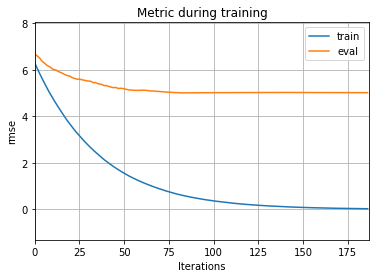

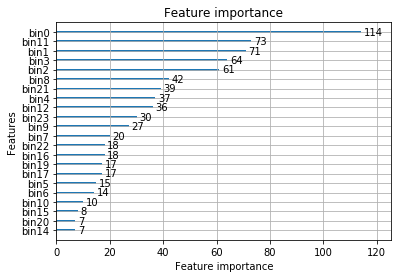

In [14]:
print('Plot metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='rmse')
#if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_metric_"+saveName+".pdf")

print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=x_val.shape[1])
# ax.figure.set_size_inches(6.4*2,4.8*3)
# if(saveplots):plt.savefig(saveFolder+"/"+"lgb_plot_importance_"+saveName+".pdf")

plt.show()